In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy

In [2]:
# target function:
def p(x,location, scale):
    return 1/(scale*np.sqrt(2*np.pi)) * np.exp(-(x-location)**2)

# proposal function
def g(x,location,scale):
    return cauchy.pdf(x, loc=location, scale=scale)

def h(x,scale):
    if x>=-2 and x<=0:
        return scale*np.sqrt(2*np.pi)
    else:
        return 0

In [3]:
#importance sampling

N = 50000
loc = 1
scale = 1/np.sqrt(2)

x = cauchy.rvs(size=N,loc=loc,scale=scale)
px = p(x,loc, scale)
gx = [g(xs, loc, scale) for xs in x]
w = px/gx
hx= [h(xs, scale) for xs in x]

mean= sum(hx * w) / sum(w)
mean

0.13979953593846017

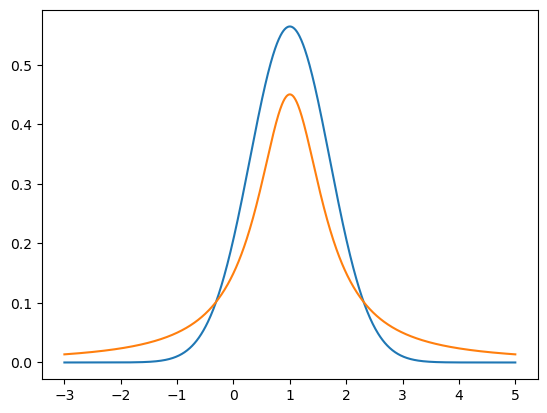

In [4]:
xs = np.linspace(-3, 5, 1000)

plt.plot(xs, p(xs, loc, scale)) 
plt.plot(xs, g(xs, loc, scale))
plt.show()